In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [112]:
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
Date         1692 non-null object
Open         1692 non-null float64
High         1692 non-null float64
Low          1692 non-null float64
Close        1692 non-null float64
Volume       1692 non-null int64
Adj Close    1692 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 86.0+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


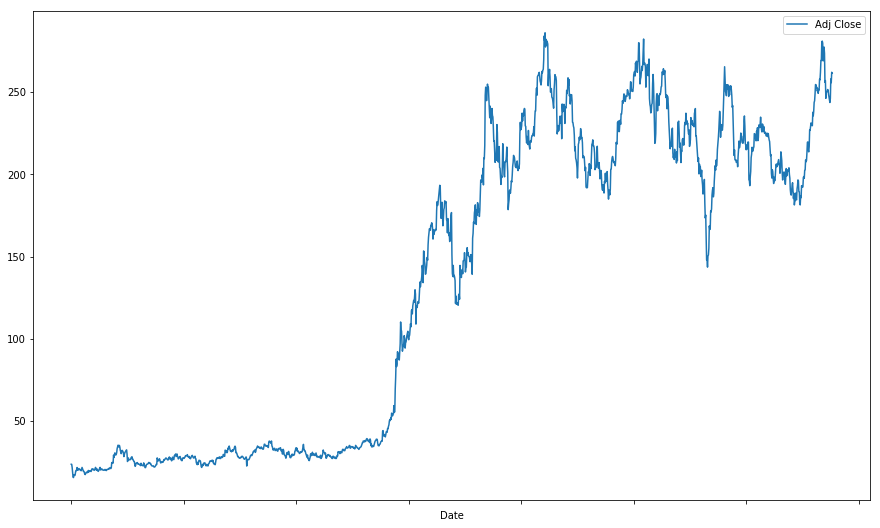

In [25]:

df.plot(x='Date', y='Adj Close', figsize=(15,9))



In [26]:
future_stock_price = int(30)

In [130]:
df['Prediction'] = df['Adj Close'].shift(-future_stock_price)

In [131]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,Prediction
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,NaN
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,NaN
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,NaN
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,NaN
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000,NaN


In [132]:
X = df.drop(['Prediction', 'Date'], axis=1)

In [133]:
from sklearn import preprocessing

In [134]:
X = preprocessing.scale(X)

In [135]:
X_future = X[-future_stock_price:]

In [136]:
X = X[:-future_stock_price]

In [137]:
X.shape

(1662, 6)

In [138]:
y= np.array(df['Prediction'])

In [139]:
y = y[:-future_stock_price]

In [140]:
y.shape

(1662,)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
confidance_linear = lm.score(X_test, y_test)
confidance_linear


0.9396786434391808

In [94]:
future_predictions = lm.predict(X_future)

In [95]:
future_predictions

array([244.55497383, 255.519637  , 254.72437771, 259.90274488,
       272.38078473, 263.16458325, 282.92051579, 285.94891365,
       275.64029434, 269.2755855 , 272.33979097, 277.67672037,
       275.48699833, 266.25693082, 259.89573629, 250.50220061,
       252.09720638, 247.23551504, 247.90537275, 246.12578737,
       248.18204516, 245.63234316, 244.90551261, 241.04203946,
       238.93377989, 241.48889484, 263.21029217, 255.40067417,
       263.05810432, 261.35201024])

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rfr = RandomForestRegressor()

In [144]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
confidance_forrest = rfr.score(X_test, y_test)
confidance_forrest

0.9494879913486928

In [168]:
future_predictions_forrest = rfr.predict(X_future)

In [169]:
future_predictions_forrest

array([263.6949998, 246.8109954, 237.8690003, 229.7080002, 237.276001 ,
       241.7390002, 233.9189956, 231.6659972, 236.206996 , 243.1179977,
       240.9520017, 235.1789977, 235.1359985, 216.7910004, 227.326001 ,
       234.9129975, 227.365001 , 234.8019989, 226.9519987, 228.5960007,
       233.1269973, 227.7819977, 249.378    , 257.1240008, 245.5349991,
       238.2249986, 244.1449952, 241.0339967, 247.4130065, 244.6230011])

In [194]:
reality = pd.DataFrame(df['Date'])
reality['ClosePrice'] = df['Adj Close']
reality.set_index('Date', inplace=True)

Predictions = pd.DataFrame(df['Date'][-future_stock_price:])
Predictions['Predictions linear'] = future_predictions
Predictions['ClosePrice'] = np.nan
Predictions.set_index('Date', inplace=True)

Forrest = pd.DataFrame(df['Date'][-future_stock_price:])
Forrest['Predictions forrest'] = future_predictions_forrest
Forrest['ClosePrice'] = np.nan
Forrest.set_index('Date', inplace=True)

In [195]:
result = pd.concat([reality, Predictions, Forrest])

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [199]:
result.tail()

,ClosePrice,Predictions forrest,Predictions linear
Date,,,
3/13/2017,NaN,238.224999,NaN
3/14/2017,NaN,244.144995,NaN
3/15/2017,NaN,241.033997,NaN
3/16/2017,NaN,247.413006,NaN
3/17/2017,NaN,244.623001,NaN


Text(0,0.5,'Price')

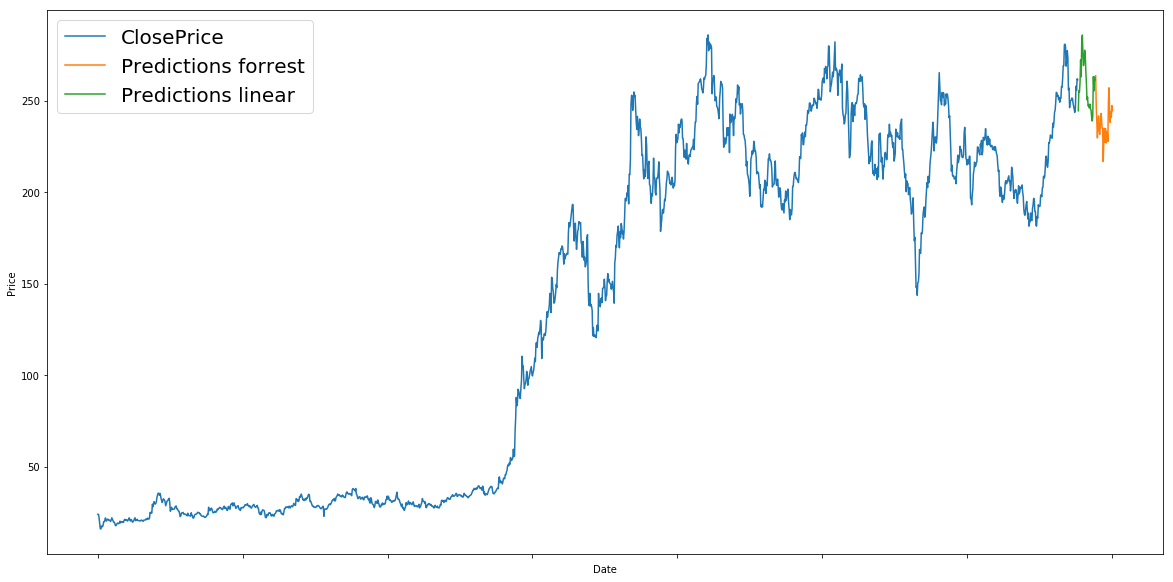

In [197]:
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

In [203]:
confidance_forrest

0.9494879913486928

In [204]:
confidance_linear

0.9396786434391808